In [2]:
import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, Imputer
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'all.zip',
 'application_test.csv',
 'application_train.csv',
 'bureau.csv',
 'bureau_balance.csv',
 'credit_card_balance.csv',
 'home-credit-exploration.ipynb',
 'HomeCredit_columns_description.csv',
 'installments_payments.csv',
 'POS_CASH_balance.csv',
 'previous_application.csv',
 'sample_submission.csv']

In [4]:
with open('HomeCredit_columns_description.csv', 'r') as file:
    content = file.read()
    print (content)
del content

,Table,Row,Description,Special
1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,
2,application_{train|test}.csv,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",
5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,
6,application_{train|test}.csv,CODE_GENDER,Gender of the client,
7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,
8,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,
9,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,
10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,
11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,
12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,
13,application_{train|test}.csv,AMT_GOODS_PRICE,For consumer loans it is th

In [3]:
dfTrain = pd.read_csv('application_train.csv')

In [4]:
dfTest = pd.read_csv('application_test.csv')

In [7]:
print('Training data shape: ', dfTrain.shape)
dfTrain.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
print('Test data shape: ', dfTest.shape)
dfTest.head()

Test data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
qdTrain = dfTrain.shape[0]
qdTest = dfTest.shape[0]
qdTotal = qdTrain + qdTest
qTrPer = (qdTrain*100)/qdTotal
qTePer = (qdTest*100)/qdTotal

In [10]:
print('Total data: ', qdTotal)
print('Percentage for training: {}'.format(qTrPer))
print('Percentage for testing: {}'.format(qTePer))
print('Number of features training: ', dfTrain.shape[1])
print('Number of features test: ', dfTest.shape[1])

Total data:  356255
Percentage for training: 86.3176657169724
Percentage for testing: 13.682334283027606
Number of features training:  122
Number of features test:  121


In [11]:
dfTrain['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

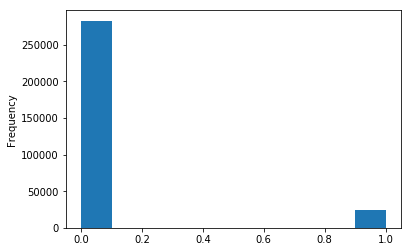

In [12]:
dfTrain['TARGET'].astype(int).plot.hist()

In [13]:
missingVal = dfTrain.isnull().sum()
MVpercent = 100 * dfTrain.isnull().sum() / len(dfTrain)
dfMissingValues = pd.concat([missingVal, MVpercent], axis=1)
dfMissingValues = dfMissingValues.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
dfMissingValues = dfMissingValues[dfMissingValues.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(3)

In [14]:
dfMissingValues.head(25)

,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.872
COMMONAREA_AVG,214865,69.872
COMMONAREA_MODE,214865,69.872
NONLIVINGAPARTMENTS_MEDI,213514,69.433
NONLIVINGAPARTMENTS_MODE,213514,69.433
NONLIVINGAPARTMENTS_AVG,213514,69.433
FONDKAPREMONT_MODE,210295,68.386
LIVINGAPARTMENTS_MODE,210199,68.355
LIVINGAPARTMENTS_MEDI,210199,68.355
LIVINGAPARTMENTS_AVG,210199,68.355


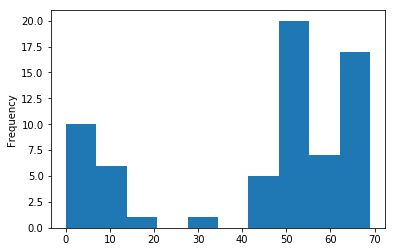

In [15]:
dfMissingValues['% of Total Values'].astype(int).plot.hist()

In [16]:
x = dfTrain.dtypes.value_counts()
idX2 = 0
ls = ['float64','int64', 'object']
for idx in range(len(x)):
    per = (x[idx]*100)/x.sum()
    print('{} has a percentage of {:0.2f}'.format(ls[idX2], per))
    idX2 += 1


float64 has a percentage of 53.28
int64 has a percentage of 33.61
object has a percentage of 13.11


#### Cuales son las columnas tipo object

In [17]:
dfTrain.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

Para evitar aumento innecesario de la dimensionalidad, para las 'object' que solo son dos unicas cosas usaremos label encoder (0,1) y OneHot para las que son mayores a 2 para evitar darle mas peso a una forma de la varible que a otra usando label encoder

In [5]:
labelEnc = LabelEncoder()
for column in dfTrain:
    if dfTrain[column].dtype == 'object':
        if len(list(dfTrain[column].unique())) <= 2:
            labelEnc.fit(dfTrain[column])
            dfTrain[column] = labelEnc.transform(dfTrain[column])
            dfTest[column] = labelEnc.transform(dfTest[column])

In [6]:
dfTrain = pd.get_dummies(dfTrain)
dfTest = pd.get_dummies(dfTest)

In [20]:
print('Number of features training: ', dfTrain.shape[1])
print('Number of features test: ', dfTest.shape[1])

Number of features training:  243
Number of features test:  239


Hacer One Hot ha creado mas columnas y ha desalineado los dos df, no pueden estar así, entonces toca alinearlos

In [7]:
targetLabel = dfTrain['TARGET'] #Guardamos el label para mas adelante

In [8]:
dfTrain, dfTest = dfTrain.align(dfTest, join = 'inner', axis = 1) #Los unimos por el axis=1 por las columnas

In [9]:
dfTrain['TARGET'] = targetLabel #Volvemos a añadir la columna del target

In [24]:
print('Number of features training: ', dfTrain.shape[1])
print('Number of features test: ', dfTest.shape[1])

Number of features training:  240
Number of features test:  239


Los datos poseen columnas de información sobre días, y puede ser que estos días tengan fechas curiosas por error

In [25]:
#Las columnas seran: DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION
(dfTrain['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

Como se puede ver, los datos (pasados desde negativos) tienen una descripcion normal, con una minina edad de 20 años y una maxima de 69.
Con lo que está en unos rangos normales

Siguiente columna

In [26]:
(dfTrain['DAYS_EMPLOYED']).describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Y ahora como que algo no cuadra, todos los datos van en un buen rango excepto el maximo, porque no tiene ningun sentido, si los días se cuentan en negativo hacia atras porque esta positivo, y ademas ese numero es gigante, veamos cuanto es en años (365243)

In [27]:
365243/365

1000.6657534246575

Mas de mil años, algo no funciona con ese valor, entonces veamos que tal se ven en grafica

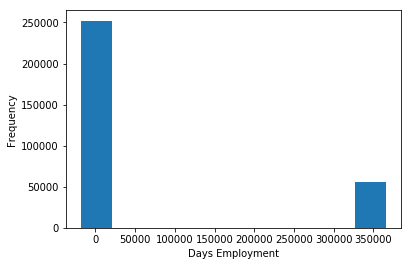

In [28]:
dfTrain['DAYS_EMPLOYED'].plot.hist();
plt.xlabel('Days Employment');

In [29]:
raros = dfTrain[dfTrain['DAYS_EMPLOYED'] > 0]
print('Hay %d dias que no cuadran' % len(raros))

Hay 55374 dias que no cuadran


No son poquitos los que justamente andan entre el 75% y el 100%, algo hay que hacer

In [10]:
dfTrain['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

Veamos en test que tal

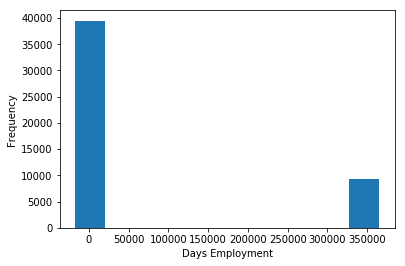

In [31]:
dfTest['DAYS_EMPLOYED'].plot.hist();
plt.xlabel('Days Employment');

O mira de nuevo los raros, vamos a hacerles lo mismo

In [11]:
dfTest['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

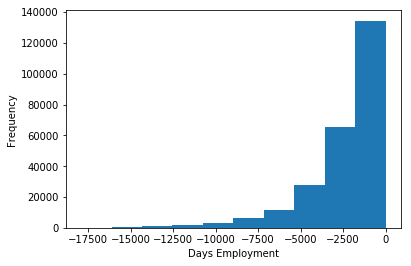

In [33]:
dfTrain['DAYS_EMPLOYED'].plot.hist();
plt.xlabel('Days Employment');

Mira que bien que se ve ahora

In [34]:
(dfTrain['DAYS_REGISTRATION']).describe()

count    307511.000000
mean      -4986.120328
std        3522.886321
min      -24672.000000
25%       -7479.500000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64

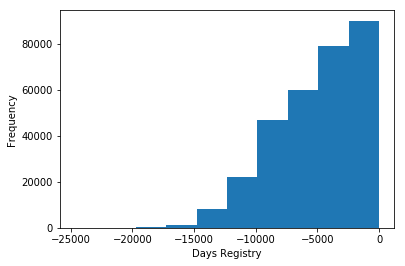

In [35]:
dfTrain['DAYS_REGISTRATION'].plot.hist();
plt.xlabel('Days Registry');

In [36]:
(dfTrain['OWN_CAR_AGE']).describe()

count    104582.000000
mean         12.061091
std          11.944812
min           0.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          91.000000
Name: OWN_CAR_AGE, dtype: float64

In [37]:
dfTrain['OWN_CAR_AGE'].head(25)

0      NaN
1      NaN
2     26.0
3      NaN
4      NaN
5      NaN
6     17.0
7      8.0
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13    23.0
14     NaN
15    17.0
16     NaN
17     NaN
18     NaN
19     NaN
20     7.0
21    14.0
22     NaN
23     NaN
24     7.0
Name: OWN_CAR_AGE, dtype: float64

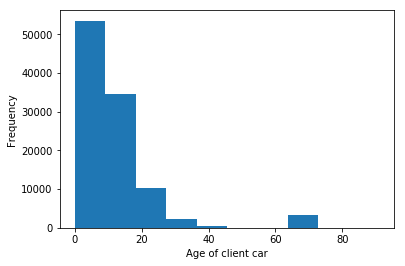

In [38]:
dfTrain['OWN_CAR_AGE'].plot.hist();
plt.xlabel('Age of client car');

Ahora que nos encargamos de las columnas tipo 'object' y de las cosas raras miremos correlaciones y luego creamos algunas variables pensando en el problema

In [39]:
correlations = dfTrain.corr()['TARGET'].sort_values()

En correlations mostramos todas las correlaciones, pero vamos a ver solamente las 10 mas positivas y negativas

In [40]:
print('Correlaciones mas positivas:\n', correlations.tail(11))
print('\nCorrelaciones mas negativas:\n', correlations.head(10))

Correlaciones mas positivas:
 NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Correlaciones mas negativas:
 EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_1                           -0.155317
NAME_EDUCATION_TYPE_Higher education   -0.056593
CODE_GENDER_F                   

Para efectos de Feature Engineering se van a añadir las siguientes variables:

CREDITINC_PERCENT: cuanto porcentaje representa el credito en los ingresos del cliente

ANNINC_PERCENT: anualmente cuando porcentaje es el credito de los ingresos del cliente

EMPLOYMENTDAYS_PERCENT: por cuanto tiempo en la vida total del cliente a trabajado

MORE_2_CHILDREN: si tiene mas de dos hijos, por el tema de costos elevados

MEAN_EXT_SOURCE: promedio de las tres referencias externas

DISTANCE_EXTS_COM: distancia al promedio de MEAN_EXT_SOURCE que tienen los valores positivos en dfTtrain

Añadir variables a train

In [12]:
dfTrain['CREDITINC_PERCENT'] = dfTrain['AMT_CREDIT'] / dfTrain['AMT_INCOME_TOTAL']
dfTrain['ANNINC_PERCENT'] = dfTrain['AMT_ANNUITY'] / dfTrain['AMT_INCOME_TOTAL']
dfTrain['EMPLOYMENTDAYS_PERCENT'] = dfTrain['DAYS_EMPLOYED'] / dfTrain['DAYS_BIRTH']
dfTrain['MORE_2_CHILDREN'] = dfTrain['CNT_CHILDREN'].map(lambda x: 1 if x > 1 else 0)
dfTrain['SUM_EXT_SOURCE'] = dfTrain['EXT_SOURCE_1']+dfTrain['EXT_SOURCE_2']+dfTrain['EXT_SOURCE_3']
dfTrain['MEAN_EXT_SOURCES'] = dfTrain['SUM_EXT_SOURCE']/3

In [13]:
groupsTarget = dfTrain['MEAN_EXT_SOURCES'].groupby(dfTrain['TARGET'])
groupsTarget.mean()

TARGET
0    0.520020
1    0.401423
Name: MEAN_EXT_SOURCES, dtype: float64

In [14]:
disMeanExt = groupsTarget.mean()[0]
disMeanExt

0.5200202378892622

In [15]:
dfTrain['DISTANCE_EXTS_COM'] = disMeanExt - dfTrain['MEAN_EXT_SOURCES']

In [70]:
dfTrain.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET,CREDITINC_PERCENT,ANNINC_PERCENT,EMPLOYMENTDAYS_PERCENT,MORE_2_CHILDREN,SUM_EXT_SOURCE,MEAN_EXT_SOURCES,DISTANCE_EXTS_COM
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,1,0,1,2.007889,0.121978,0.067329,0,0.485361,0.161787,0.358233
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,1,0,0,4.790750,0.132217,0.070862,0,NaN,NaN,NaN
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0,0,0,2.000000,0.100000,0.011814,0,NaN,NaN,NaN
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0,0,0,2.316167,0.219900,0.159905,0,NaN,NaN,NaN
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0,0,0,4.222222,0.179963,0.152418,0,NaN,NaN,NaN


Añadir variables a test

In [16]:
dfTest['CREDITINC_PERCENT'] = dfTest['AMT_CREDIT'] / dfTest['AMT_INCOME_TOTAL']
dfTest['ANNINC_PERCENT'] = dfTest['AMT_ANNUITY'] / dfTest['AMT_INCOME_TOTAL']
dfTest['EMPLOYMENTDAYS_PERCENT'] = dfTest['DAYS_EMPLOYED'] / dfTest['DAYS_BIRTH']
dfTest['MORE_2_CHILDREN'] = dfTest['CNT_CHILDREN'].map(lambda x: 1 if x > 1 else 0)
dfTest['SUM_EXT_SOURCE'] = dfTest['EXT_SOURCE_1']+dfTest['EXT_SOURCE_2']+dfTest['EXT_SOURCE_3']
dfTest['MEAN_EXT_SOURCES'] = dfTest['SUM_EXT_SOURCE']/3
dfTest['DISTANCE_EXTS_COM'] = disMeanExt - dfTest['MEAN_EXT_SOURCES']

In [72]:
dfTest.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,CREDITINC_PERCENT,ANNINC_PERCENT,EMPLOYMENTDAYS_PERCENT,MORE_2_CHILDREN,SUM_EXT_SOURCE,MEAN_EXT_SOURCES,DISTANCE_EXTS_COM
0,100001,0,0,1,0,135000.0,568800.0,20560.5,450000.0,0.018850,...,0,1,0,4.213333,0.152300,0.121044,0,1.701788,0.567263,-0.047243
1,100005,0,0,1,0,99000.0,222768.0,17370.0,180000.0,0.035792,...,0,0,0,2.250182,0.175455,0.247398,0,1.289607,0.429869,0.090151
2,100013,0,1,1,0,202500.0,663264.0,69777.0,630000.0,0.019101,...,0,0,0,3.275378,0.344578,0.222477,0,NaN,NaN,NaN
3,100028,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,...,0,1,0,5.000000,0.155614,0.133515,1,1.648115,0.549372,-0.029352
4,100038,0,1,0,1,180000.0,625500.0,32067.0,625500.0,0.010032,...,0,0,0,3.475000,0.178150,0.168021,0,NaN,NaN,NaN


### Modelos

In [17]:
# Preparamos dfTrain:
dfTrain = dfTrain.drop('TARGET', axis=1) #Recordad Target as targetLabel

nanReplacer = Imputer(strategy='median')

nanReplacer.fit(dfTrain)

train1 = nanReplacer.transform(dfTrain)
testF = nanReplacer.transform(dfTest)

XTrain, XVal, ytrain, yval = train_test_split(train1, targetLabel, test_size=0.3)

#### Decision Tree

In [104]:
dt = Pipeline(
    [
        #('scaler', MinMaxScaler()),
        ('reg', DecisionTreeClassifier(criterion='entropy'))
    ]
)
dt.fit(XTrain, ytrain)

Pipeline(memory=None,
     steps=[('reg', DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

In [105]:
train_score = f1_score(ytrain, dt.predict(XTrain))
train_score

1.0

In [106]:
val_score = f1_score(yval, dt.predict(XVal))
val_score

0.15991902834008098

In [107]:
train_score_acc = accuracy_score(ytrain, dt.predict(XTrain))
val_score_acc = accuracy_score(yval, dt.predict(XVal))
print(train_score_acc)
print(val_score_acc)

1.0
0.8560496021852712


#### Random Forest

In [22]:
rf = Pipeline(
    [
        #('scaler', MinMaxScaler()),
        ('reg', RandomForestClassifier(criterion='entropy'))
    ]
)
rf.fit(XTrain, ytrain)

Pipeline(memory=None,
     steps=[('reg', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [110]:
train_score = f1_score(ytrain, rf.predict(XTrain))
train_score

0.8986895960909985

In [111]:
val_score = f1_score(yval, rf.predict(XVal))
val_score

0.023198227551153392

In [112]:
train_score_acc = accuracy_score(ytrain, rf.predict(XTrain))
val_score_acc = accuracy_score(yval, rf.predict(XVal))
print(train_score_acc)
print(val_score_acc)

0.9851665683345954
0.9187569102694734


100
200
300
400
500


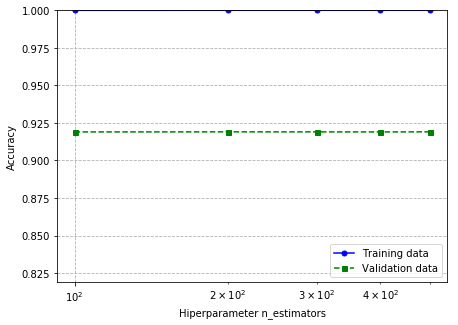

In [117]:
# Listas para guardar el score
train_scores = []
val_scores = []
param_range = [100, 200, 300, 400, 500]
for f in param_range:
    
    clf = RandomForestClassifier(n_estimators=f ,criterion='entropy')
    
    clf.fit(XTrain, ytrain)
    y_train_pred = clf.predict(XTrain)
    y_val_pred = clf.predict(XVal)
    
    train_score = accuracy_score(ytrain, y_train_pred)
    val_score = accuracy_score(yval, y_val_pred)
    
    train_scores.append(train_score)
    val_scores.append(val_score)
    print (f)
    

# plot the scores along the diffent values of the hiper parameter
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
ax.plot(
    param_range, train_scores, color='blue',
    marker='o', linestyle='-', markersize=5, 
    label='Training data'
)

ax.plot(
    param_range, val_scores, color='green',
    marker='s', linestyle='--', markersize=5, 
    label='Validation data'
)

ax.set_xscale('log')
ax.set_xlabel('Hiperparameter n_estimators')
ax.set_ylabel('Accuracy')
ax.set_ylim(min(min(train_scores, val_scores)) - 0.1, 1)
ax.grid(linestyle='--')
ax.legend(loc='lower right')

In [20]:
import eli5

In [23]:
pImportance = eli5.sklearn.PermutationImportance(rf, cv='prefit').fit(XVal,yval)

In [25]:
features = list(dfTrain.columns)

In [27]:
eli5.show_weights(pImportance, feature_names=features)

Weight,Feature
0.0003 ± 0.0002,SUM_EXT_SOURCE
0.0003 ± 0.0002,EXT_SOURCE_3
0.0003 ± 0.0002,DAYS_BIRTH
0.0003 ± 0.0002,DAYS_EMPLOYED
0.0002 ± 0.0001,DAYS_LAST_PHONE_CHANGE
0.0002 ± 0.0001,DISTANCE_EXTS_COM
0.0002 ± 0.0001,LIVINGAREA_AVG
0.0002 ± 0.0001,EXT_SOURCE_2
0.0001 ± 0.0001,ANNINC_PERCENT
0.0001 ± 0.0002,AMT_ANNUITY


#### SVC

In [ ]:
sv = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('reg', LinearSVC())
    ]
)
sv.fit(XTrain, ytrain)

In [ ]:
train_score = f1_score(ytrain, sv.predict(XTrain))
train_score

In [ ]:
val_score = f1_score(yval, sv.predict(XVal))
val_score

In [ ]:
train_score_acc = accuracy_score(ytrain, sv.predict(XTrain))
val_score_acc = accuracy_score(yval, sv.predict(XVal))
print(train_score_acc)
print(val_score_acc)